# Experimentations
## Comparison between involution and convolution on CIFAR10 

## Instructions

- Create and checkout a branch for your work (`git checkout -b YOUR_BRANCH_NAME`)
- Create a copy of this template and name it however you want (e.g. `YOUR_NAME.ipynb`).
- Change the title according to what scenario you are testing.
- In the "involution" part, replace the existing model with the relevant model.
- Create as many cells as you deem necessary for the experiments (explain your use case, comparison with convolution or other networks, results, etc.).
- Remove this cell and every "TODO" comment.
- When you are done, commit your changes. Make sure you are only committing changes on the file you created! (you can check with `git status`)
- Push your changes on the repo (`git push --set-upstream origin YOUR_BRANCH_NAME`).
- Create a pull request to the `main` branch so that everyone can read your code before we merge it.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from involution import Involution
import time
import visualkeras

## Import and formatting of data (CIFAR10)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

class_img = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse' , 'ship', 'truck']

num_classes = len(class_img)

batch_size = 256

epochs = 10 # TODO A AUGMENTER

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Creating datasets
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(batch_size).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices( (x_test, y_test)).batch(batch_size)

## Convolution (model 1)

In [3]:
modelCNN1 = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes),
    ]
)

In [4]:
modelCNN1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

start_time_CNN1 = time.time()

history = modelCNN1.fit(x=x_train, 
          y=y_train, 
          epochs=epochs, 
          validation_data=(x_test, y_test),
          verbose=1)

training_time_CNN1 = time.time() - start_time_CNN1

accuracy_CNN1 = np.max(history.history['val_accuracy'])

Epoch 1/10
1563/1563 [==============================] - 17s 9ms/step - loss: 1.4135 - accuracy: 0.4907 - val_loss: 1.1370 - val_accuracy: 0.5994
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0078 - accuracy: 0.6443 - val_loss: 0.9312 - val_accuracy: 0.6762
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8494 - accuracy: 0.7043 - val_loss: 0.8607 - val_accuracy: 0.7028
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7416 - accuracy: 0.7394 - val_loss: 0.8618 - val_accuracy: 0.7120
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.6580 - accuracy: 0.7694 - val_loss: 0.8228 - val_accuracy: 0.7196
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5799 - accuracy: 0.7953 - val_loss: 0.8825 - val_accuracy: 0.7082
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5126 - accuracy: 0.8183 - val_loss: 0.8932 - val_ac

In [5]:
modelCNN1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [6]:
print("Accuracy of CNN model 1 : " + str(accuracy_CNN1))
print("Training time of CNN model 1 : " + str(training_time_CNN1))

Accuracy of CNN model 1 : 0.7337999939918518
Training time of CNN model 1 : 140.04995965957642


Text(0.5, 0, '# Epochs')

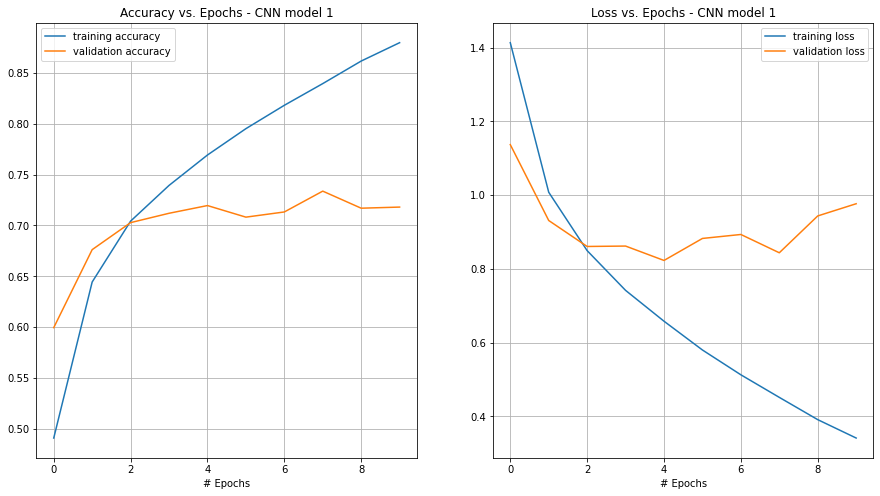

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

ax[0].plot(history.history['accuracy'], label='training accuracy')
ax[0].plot(history.history['val_accuracy'], label='validation accuracy')
ax[0].grid()
ax[0].legend()
ax[0].set_title('Accuracy vs. Epochs - CNN model 1')
ax[0].set_xlabel('# Epochs')

ax[1].plot(history.history['loss'], label='training loss')
ax[1].plot(history.history['val_loss'], label='validation loss')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Loss vs. Epochs - CNN model 1')
ax[1].set_xlabel('# Epochs')

## Involution (model 1)

In [8]:
modelINN1 = tf.keras.models.Sequential([
    Involution(channel=3,group_number=1,kernel_size=3,stride=1,reduction_ratio=2),
    tf.keras.layers.ReLU(name="relu1"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    Involution(channel=3,group_number=1,kernel_size=3,stride=1,reduction_ratio=2),
    tf.keras.layers.ReLU(name="relu2"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    Involution(channel=3,group_number=1,kernel_size=3,stride=1,reduction_ratio=2),
    tf.keras.layers.ReLU(name="relu3"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes),
])

modelINN1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [9]:
start_time_INN1 = time.time()

history = modelINN1.fit(x=x_train, 
          y=y_train, 
          epochs=epochs, 
          validation_data=(x_test, y_test),
          verbose=1)

training_time_INN1 = time.time() - start_time_INN1

accuracy_INN1 = np.max(history.history['val_accuracy'])

Epoch 1/10
1563/1563 [==============================] - 25s 15ms/step - loss: 2.0495 - accuracy: 0.2509 - val_loss: 1.8104 - val_accuracy: 0.3570
Epoch 2/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.7387 - accuracy: 0.3838 - val_loss: 1.6716 - val_accuracy: 0.4093
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6543 - accuracy: 0.4132 - val_loss: 1.6379 - val_accuracy: 0.4211
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6122 - accuracy: 0.4309 - val_loss: 1.6203 - val_accuracy: 0.4231
Epoch 5/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5829 - accuracy: 0.4427 - val_loss: 1.5901 - val_accuracy: 0.4354
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5603 - accuracy: 0.4492 - val_loss: 1.5641 - val_accuracy: 0.4457
Epoch 7/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5411 - accuracy: 0.4566 - val_loss: 1.5473 -

In [10]:
print("Accuracy of INN model 1 : " + str(accuracy_INN1))
print("Training time of CINN model 1 : " + str(training_time_INN1))

Accuracy of INN model 1 : 0.4593999981880188
Training time of CINN model 1 : 230.56886625289917


In [11]:
modelINN1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 involution (Involution)     (None, 32, 32, 3)         26        
                                                                 
 relu1 (ReLU)                (None, 32, 32, 3)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 3)        0         
 2D)                                                             
                                                                 
 involution_1 (Involution)   (None, 16, 16, 3)         26        
                                                                 
 relu2 (ReLU)                (None, 16, 16, 3)         0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 3)          0         
 2D)                                                  

Text(0.5, 0, '# Epochs')

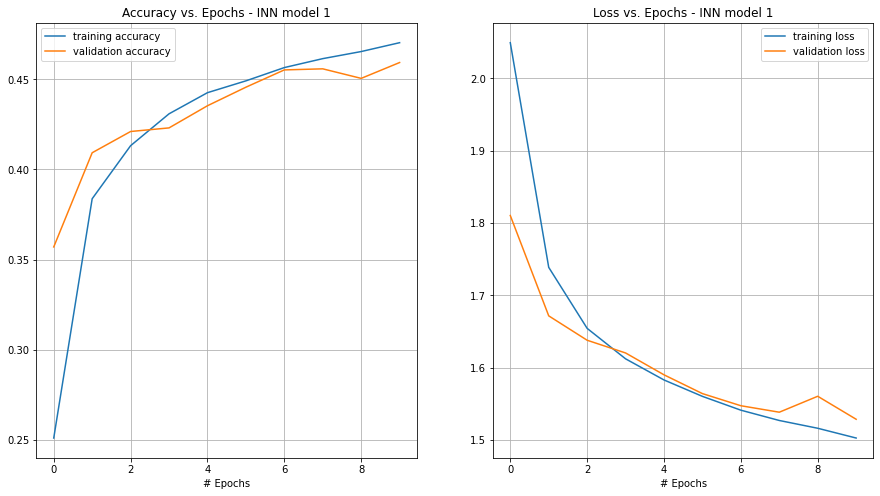

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

ax[0].plot(history.history['accuracy'], label='training accuracy')
ax[0].plot(history.history['val_accuracy'], label='validation accuracy')
ax[0].grid()
ax[0].legend()
ax[0].set_title('Accuracy vs. Epochs - INN model 1')
ax[0].set_xlabel('# Epochs')

ax[1].plot(history.history['loss'], label='training loss')
ax[1].plot(history.history['val_loss'], label='validation loss')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Loss vs. Epochs - INN model 1')
ax[1].set_xlabel('# Epochs')

**Comparison CNN | INN** *(Google Colab, with GPU)*:

*   Number of parameters: 319,178 | 13,080
*   Execution time (seconds): 142.63 | 231.14
*   Accuracy: 0.73 | 0.45

## Représentation graphique des modèles

### Convolution

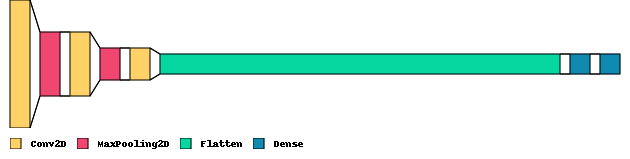

In [14]:
visualkeras.layered_view(modelCNN1, draw_volume=False, legend=True)

### Involution

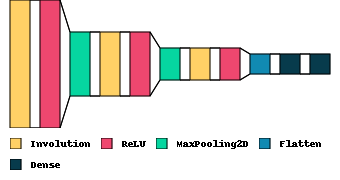

In [15]:
visualkeras.layered_view(modelINN1, draw_volume=False, legend=True)